<a href="https://colab.research.google.com/github/athirarama/rama/blob/master/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
df=pd.read_csv('/content/Salary_Data (1).csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
df[df.duplicated()]

,YearsExperience,Salary


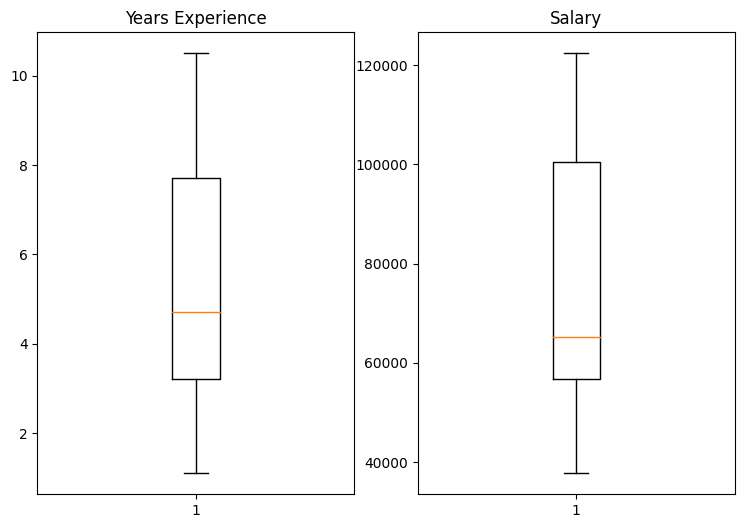

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['YearsExperience'])
plt.title('Years Experience')
plt.subplot(122)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

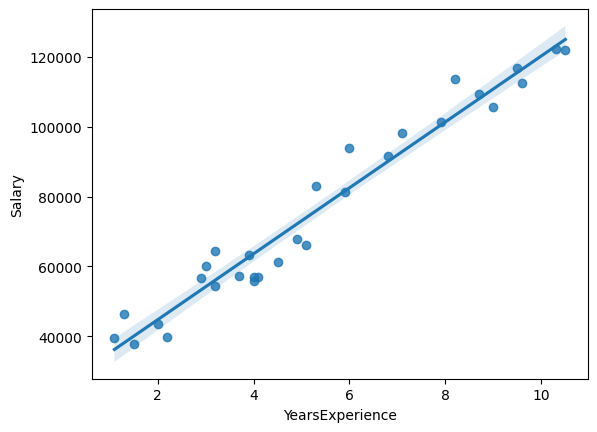

In [ ]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

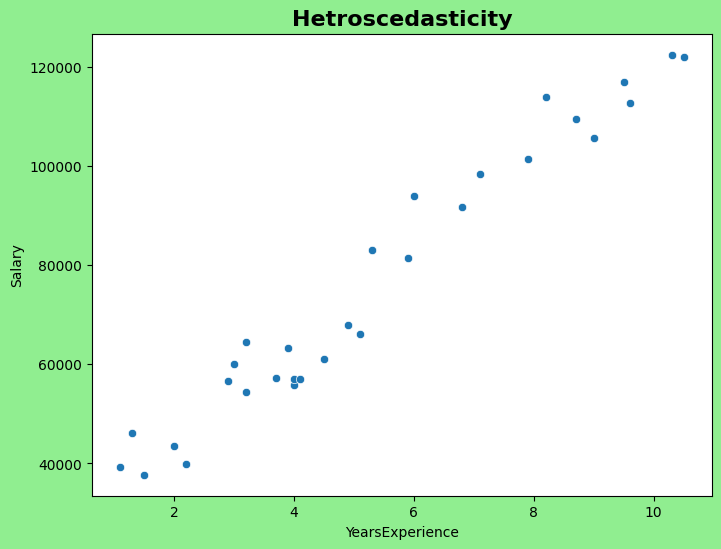

In [ ]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [45]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

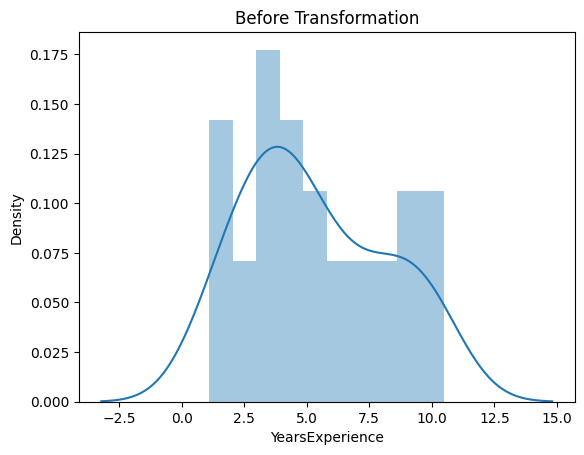

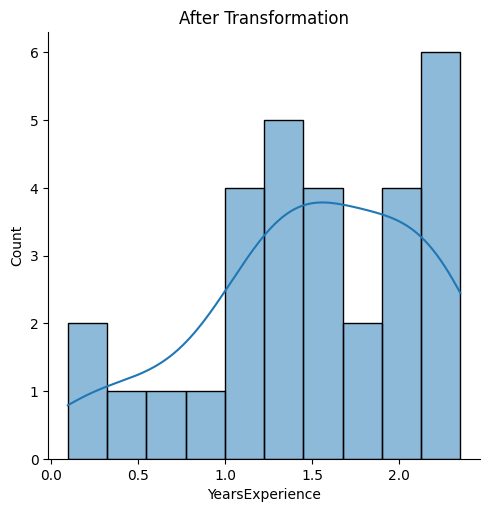

In [46]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

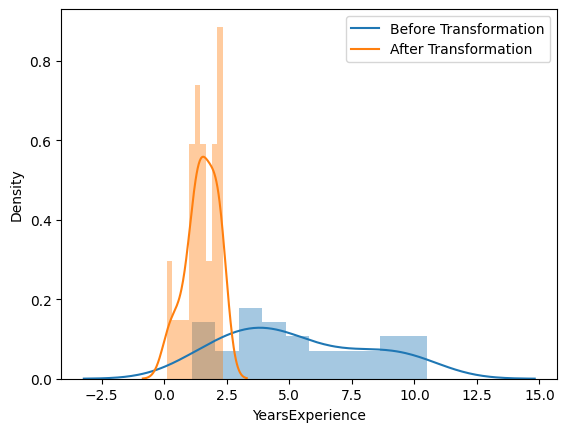

In [47]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

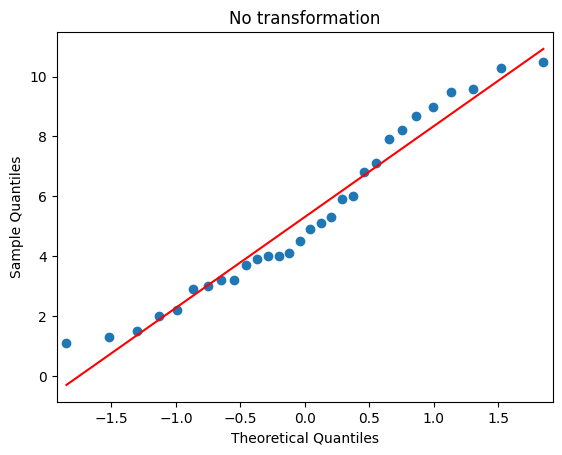

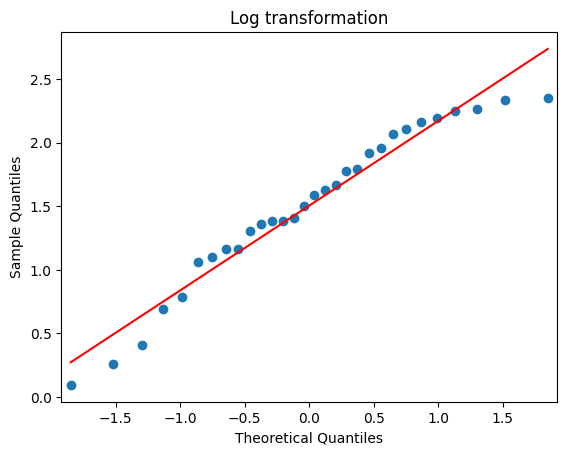

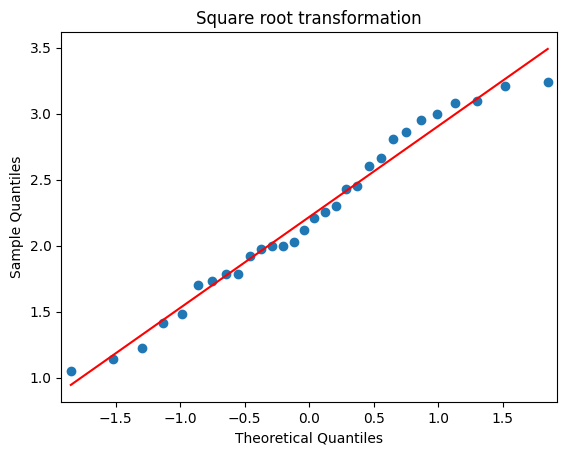

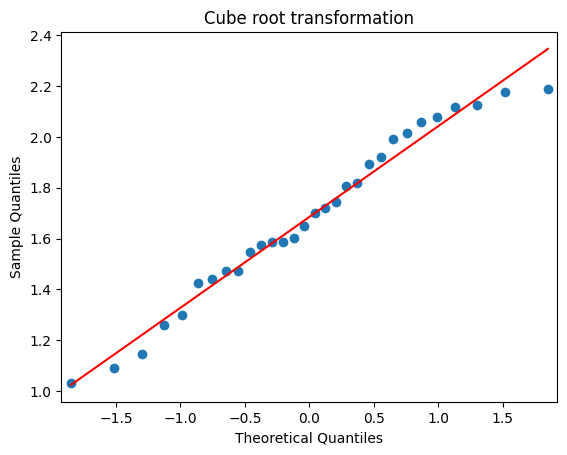

In [48]:
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

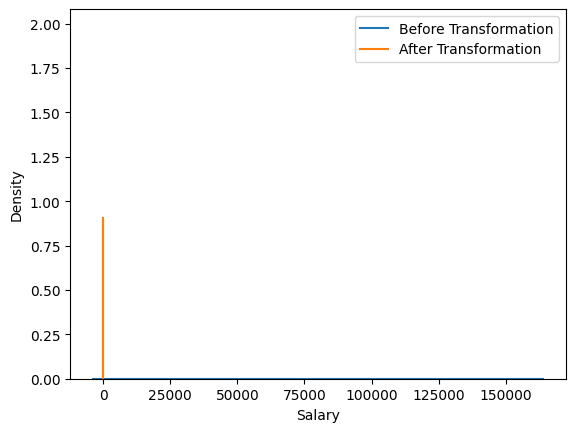

In [49]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.distplot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

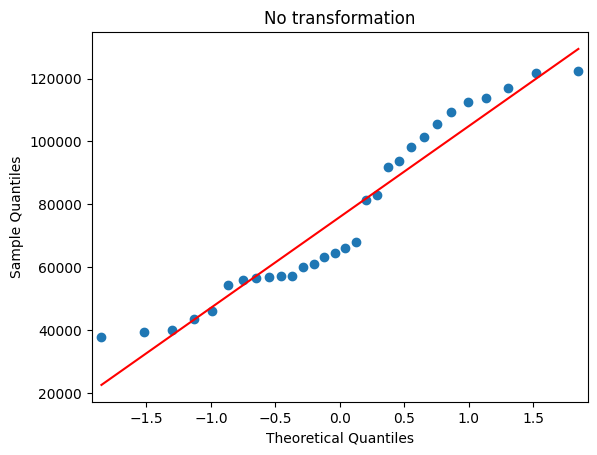

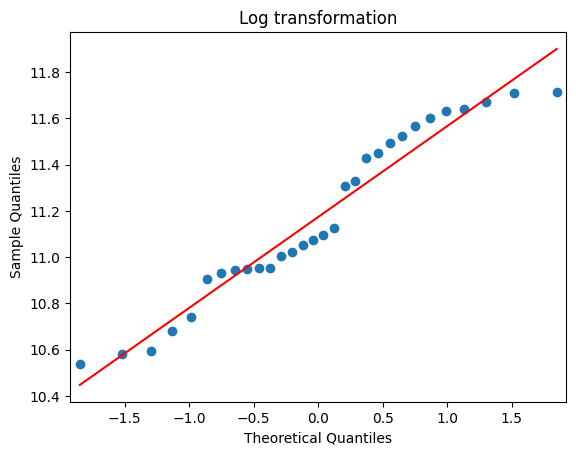

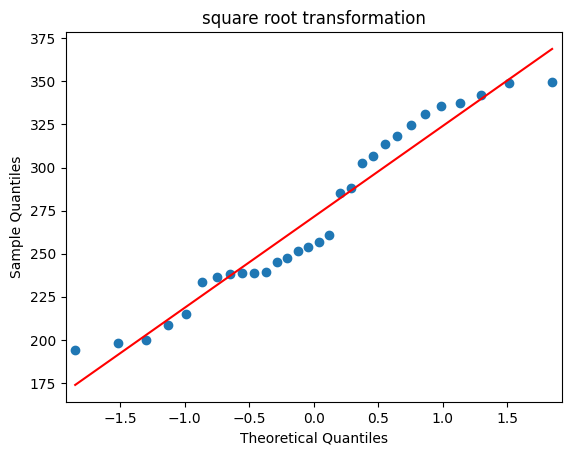

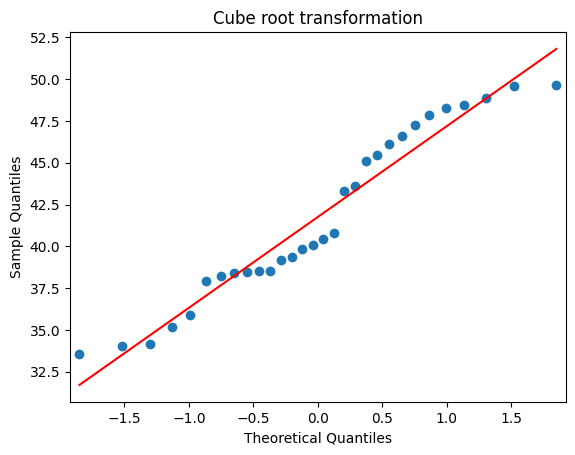

In [50]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [52]:
model = sm.ols('YearsExperience~Salary', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        21:13:53   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model1 = sm.ols('np.sqrt(YearsExperience)~np.sqrt(Salary)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(YearsExperience)   R-squared:                       0.942
Model:                                  OLS   Adj. R-squared:                  0.940
Method:                       Least Squares   F-statistic:                     454.3
Date:                      Sun, 11 Feb 2024   Prob (F-statistic):           7.58e-19
Time:                              21:15:20   Log-Likelihood:                 14.149
No. Observations:                        30   AIC:                            -24.30
Df Residuals:                            28   BIC:                            -21.49
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1612      0.161     -7.208      0.000      -1.491      -0.831
np.sqrt(Salary)     0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model2 = sm.ols('np.cbrt(YearsExperience)~np.cbrt(Salary)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.cbrt(YearsExperience)   R-squared:                       0.932
Model:                                  OLS   Adj. R-squared:                  0.930
Method:                       Least Squares   F-statistic:                     386.5
Date:                      Sun, 11 Feb 2024   Prob (F-statistic):           6.37e-18
Time:                              21:16:10   Log-Likelihood:                 31.493
No. Observations:                        30   AIC:                            -58.99
Df Residuals:                            28   BIC:                            -56.18
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9290      0.134     -6.937      0.000      -1.203      -0.655
np.cbrt(Salary)     0.0626      0.003     19.659      0.000       0.056       0.069
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.612
Skew:                          -0.564   Prob(JB):                        0.447
Kurtosis:                       3.124   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model3 = sm.ols('np.log(YearsExperience)~np.log(Salary)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.905
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     267.4
Date:                     Sun, 11 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                             21:17:20   Log-Likelihood:                 7.4195
No. Observations:                       30   AIC:                            -10.84
Df Residuals:                           28   BIC:                            -8.037
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(Salary)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [57]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147
(daily) Beta1: tvalue=6.38, pvalue=0.000004
As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.
R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [58]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

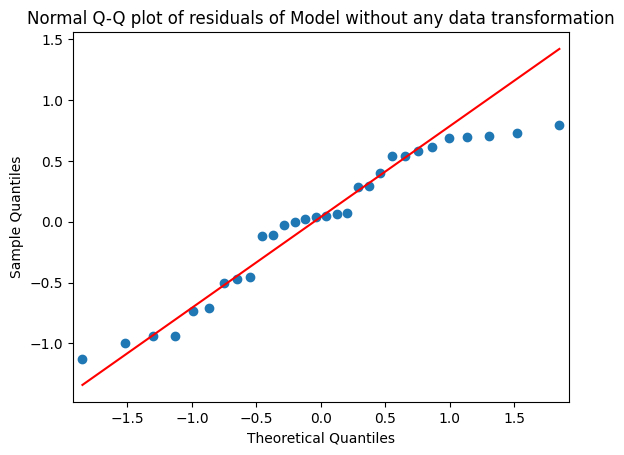

In [59]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

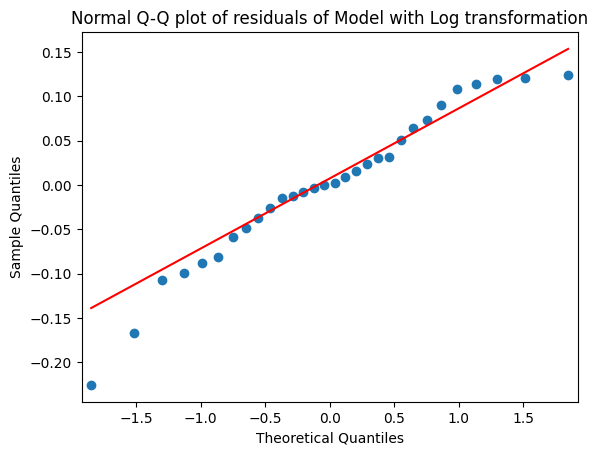

In [60]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

As you can notice in the above plots
Both The Model have slightly different plots
The first model is right skewed and doesn't follow normal distribution
The second model after log-transformation follows normal distributon with less skewness than first model

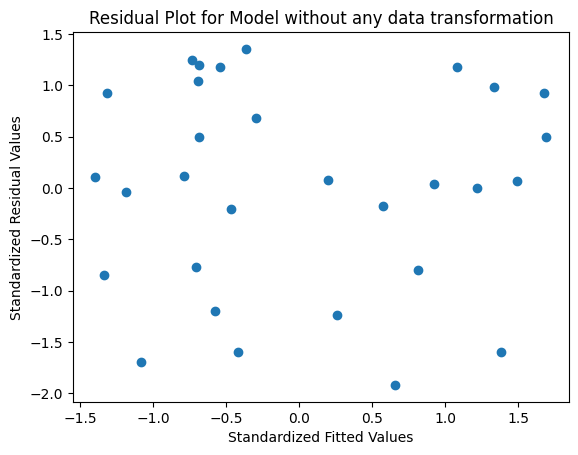

In [61]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()


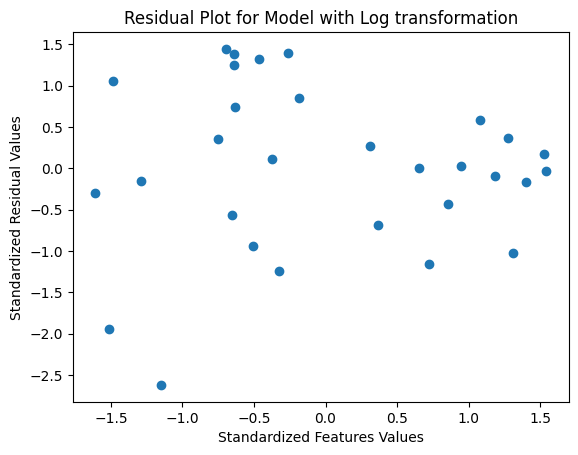

In [62]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(df1['Salary']))
model2_pred_y =pow(model2.predict(df1['Salary']),3)
model3_pred_y =np.exp(model3.predict(df1['Salary']))
model1_rmse =np.sqrt(mean_squared_error(df1['YearsExperience'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['YearsExperience'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['YearsExperience'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 0.599195054045254 
model1= 0.583215356912278 
model2= 0.5912959035338443 
model3= 0.6377755378218443


In [65]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model1'

In [68]:
predicted = pd.DataFrame()
predicted['Salary'] = df1.Salary
predicted['YearsExperience'] = df1.YearsExperience
predicted['Predicted_Years_Experience'] = pd.DataFrame(np.exp(model2.predict(predicted.Salary)))
predicted

,Salary,YearsExperience,Predicted_Years_Experience
0,39343.0,1.1,3.319881
1,46205.0,1.3,3.732703
2,37731.0,1.5,3.223430
3,43525.0,2.0,3.570969
4,39891.0,2.2,3.352707
5,56642.0,2.9,4.370662
6,60150.0,3.0,4.588492
7,54445.0,3.2,4.235167
8,64445.0,3.2,4.857822
9,57189.0,3.7,4.404506


In [69]:
predicted1 = pd.DataFrame()
predicted1['Salary'] = df1.Salary
predicted1['YearsExperience'] = df1.YearsExperience
predicted1['Predicted_YearsExperience'] = pd.DataFrame(model.predict(predicted1.Salary))
predicted1

,Salary,YearsExperience,Predicted_YearsExperience
0,39343.0,1.1,1.600934
1,46205.0,1.3,2.295819
2,37731.0,1.5,1.437694
3,43525.0,2.0,2.024427
4,39891.0,2.2,1.656428
5,56642.0,2.9,3.352729
6,60150.0,3.0,3.707969
7,54445.0,3.2,3.130248
8,64445.0,3.2,4.142905
9,57189.0,3.7,3.408121


# Delivery Time

In [71]:
delivery = pd.read_csv('/content/delivery_time (1).csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [72]:
delivery1= df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
delivery1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [73]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [74]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [76]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [77]:
df[df.duplicated()].shape

(0, 2)

In [78]:
df[df.duplicated()]

,YearsExperience,Salary


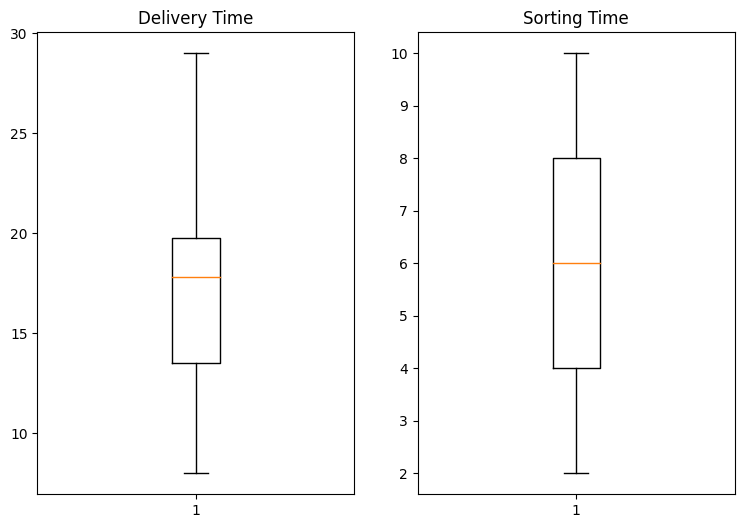

In [80]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(delivery['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(delivery['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [82]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

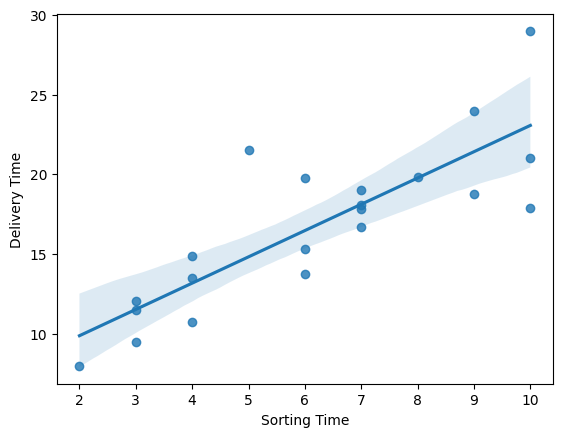

In [83]:
sns.regplot(x=delivery['Sorting Time'],y=delivery['Delivery Time'])

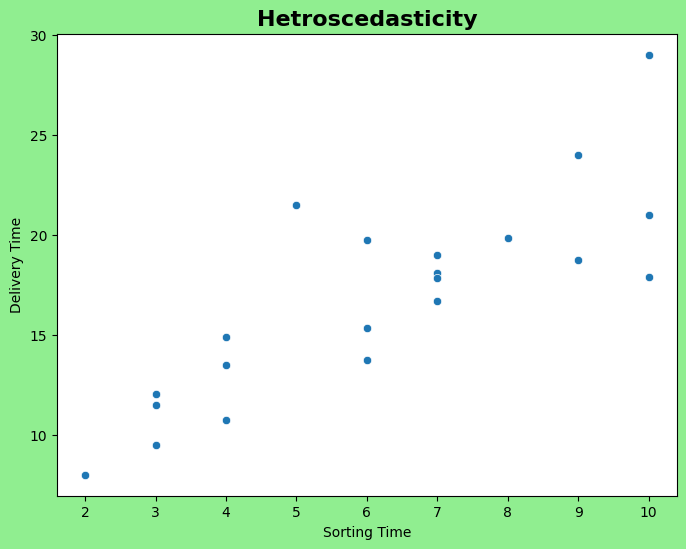

In [84]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = delivery['Sorting Time'], y = delivery['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [85]:
delivery.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

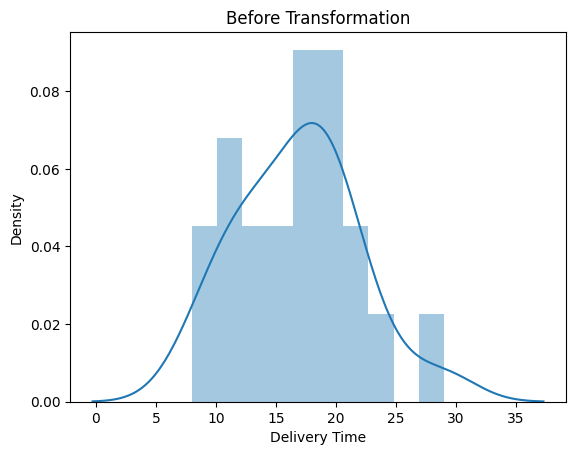

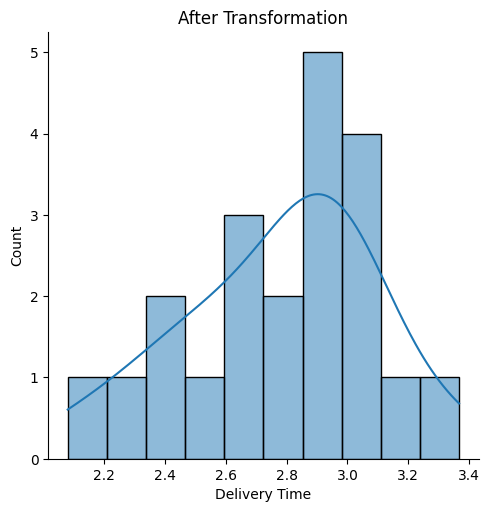

In [86]:
sns.distplot(delivery['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(delivery['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

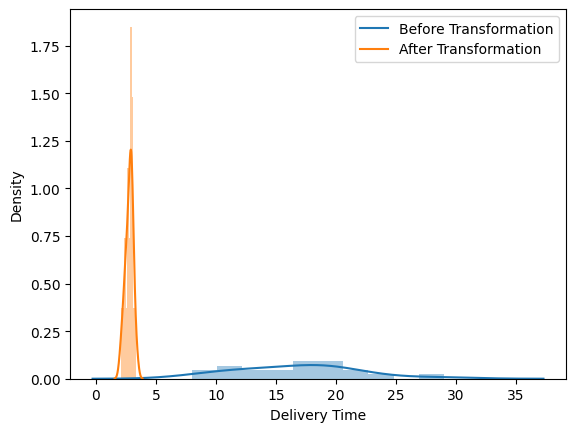

In [87]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

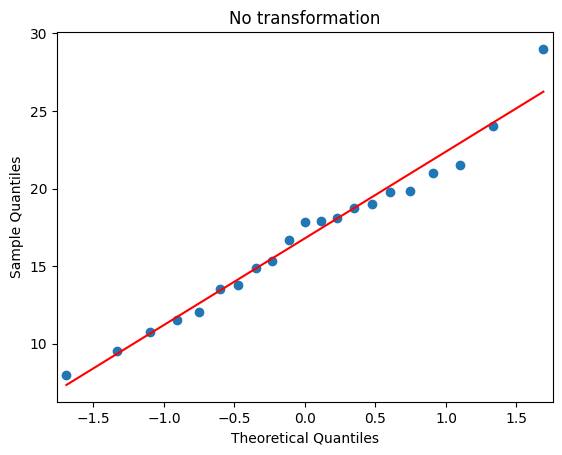

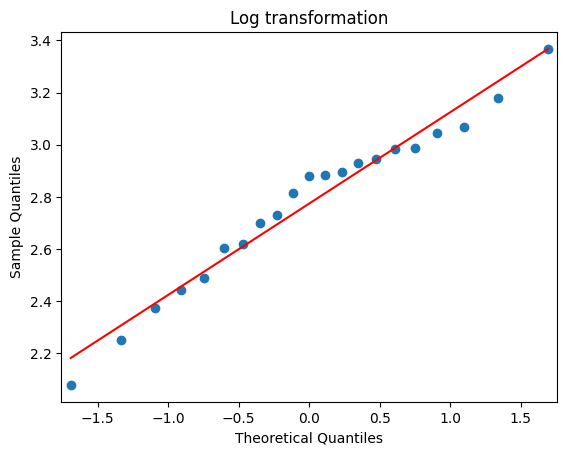

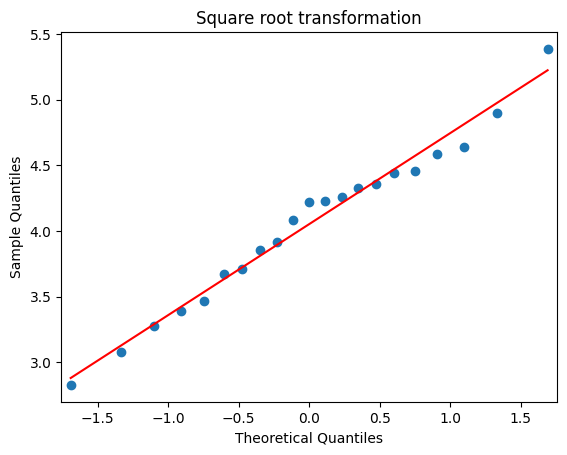

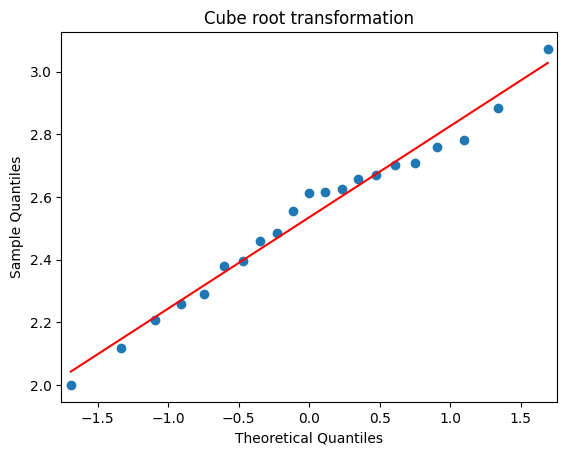

In [88]:
smf.qqplot(delivery['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(delivery['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(delivery['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(delivery['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

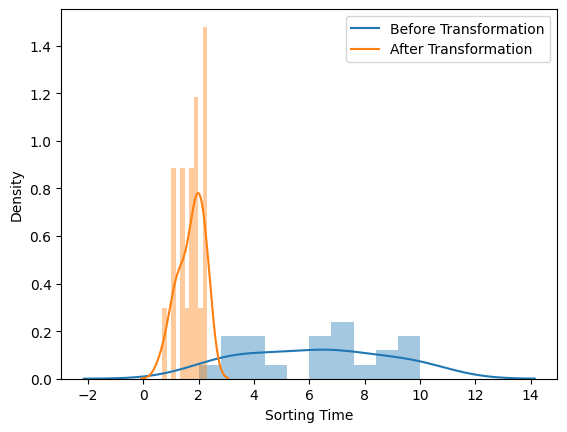

In [89]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

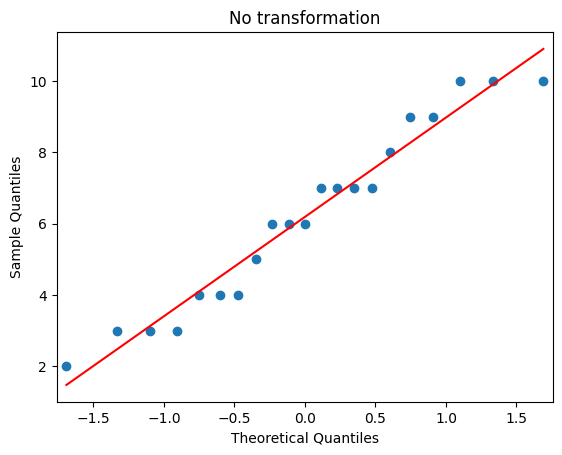

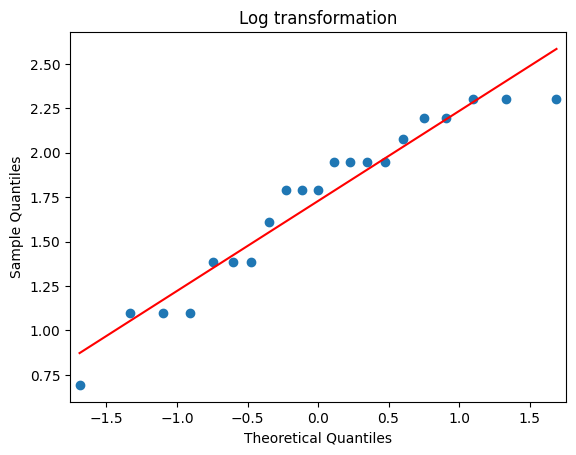

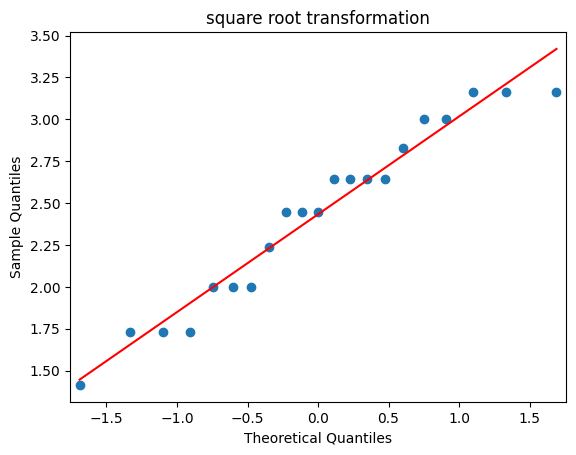

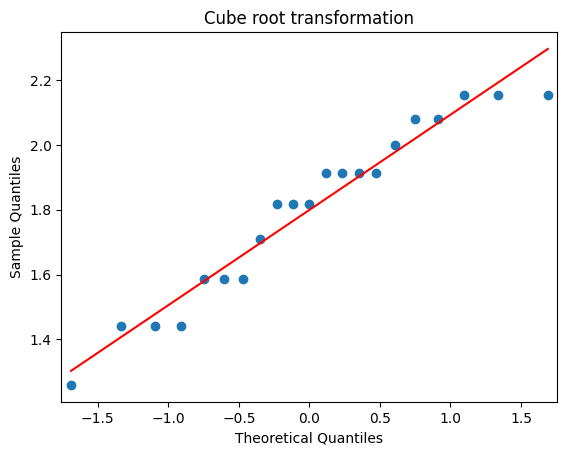

In [90]:
smf.qqplot(delivery['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(delivery['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(delivery['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(delivery['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()